### _takin' care of imports_

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import matplotlib

In [6]:
%matplotlib inline

### _read in data_

In [7]:
weather = pd.read_table('data/daily_weather.tsv')

In [8]:
stations = pd.read_table('data/stations.tsv')

In [9]:
usage = pd.read_table('data/usage_2012.tsv')

### _repeat data fixing from step1_

In [10]:
weather['date'] = pd.to_datetime(weather['date'])

In [11]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'

In [12]:
weather.loc[weather['season_desc'] == 'winter', 'season_code'] = 4
weather.loc[weather['season_desc'] == 'spring', 'season_code'] = 1
weather.loc[weather['season_desc'] == 'summer', 'season_code'] = 2
weather.loc[weather['season_desc'] == 'fall', 'season_code'] = 3

# 1. To start with, we'll need to compute the number of rentals per station per day. Use pandas to do that.

### _we found the average number of rentals per station in step2; recreated below_

In [13]:
riders_per_station = DataFrame(usage['station_start'].value_counts())

# 2a. Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
riders_per_station.head()

,0
Massachusetts Ave & Dupont Circle NW,69850
Columbus Circle / Union Station,55146
15th & P St NW,49416
17th & Corcoran St NW,43547
14th & V St NW,40242


In [17]:
stations_attrs = DataFrame(stations)
stations_attrs.index = stations.station.values
del stations_attrs['station'], stations_attrs['terminal_name']
del stations_attrs['lat'], stations_attrs['long'], stations_attrs['id']
stations_attrs['riders'] = riders_per_station
stations_attrs.head()

,no_bikes,no_empty_docks,fast_food,parking,restaurant,convenience,post_office,bicycle_parking,drinking_water,recycling,...,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery,riders
20th & Bell St,7,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1688
18th & Eads St.,6,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
20th & Crystal Dr,9,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5113
15th & Crystal Dr,4,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3094
Aurora Hills Community Ctr/18th & Hayes St,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986


In [18]:
stations_attrs = stations_attrs.dropna()

In [19]:
test_data = stations_attrs.copy()

In [20]:
test_data.head()

,no_bikes,no_empty_docks,fast_food,parking,restaurant,convenience,post_office,bicycle_parking,drinking_water,recycling,...,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery,riders
20th & Bell St,7,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1688
20th & Crystal Dr,9,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5113
15th & Crystal Dr,4,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3094
Aurora Hills Community Ctr/18th & Hayes St,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986
Pentagon City Metro / 12th & S Hayes St,8,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4231


In [21]:
riders = DataFrame(stations_attrs['riders'])

In [22]:
riders['riders'] = riders['riders'] / 366

In [23]:
riders.head()

,riders
20th & Bell St,4.612022
20th & Crystal Dr,13.969945
15th & Crystal Dr,8.453552
Aurora Hills Community Ctr/18th & Hayes St,5.426230
Pentagon City Metro / 12th & S Hayes St,11.560109


In [24]:
del stations_attrs['riders']

In [25]:
x = stations_attrs
y = riders
model.fit(x, y)
model.coef_

array([[  1.47631993e+00,   1.20997621e+00,   1.20001765e+00,
         -4.44880886e-01,   4.98548699e-01,  -5.27674964e+01,
          4.43726900e+00,  -5.42183347e+00,   3.78116531e+00,
         -4.75777202e+00,   5.15326868e-01,   1.93887898e-12,
          1.33449442e+00,   8.21577437e+01,   8.58165293e+00,
          3.07709752e-13,  -4.46389727e-12,   2.99445723e+00,
         -6.86703981e-12,   3.20123382e+00,   1.35265131e+01,
         -3.71872751e+00,   3.52007911e+00,  -3.59841499e+01,
          2.18009249e+01,  -2.95667721e+01,  -9.27332335e+00,
          3.17726623e+01,   1.57171853e+00,   2.50914976e+00,
         -5.03973981e+00,   8.22145879e+00,   3.17726623e+01,
         -2.11216897e+00,   7.20873590e+00,   9.12694248e+00,
          4.46666516e+00,  -2.44408365e+00,  -3.99141675e+01,
         -1.42029601e+01,   7.16633871e+00,   6.75920971e+00,
          7.95237024e+00,   5.77962986e-02,   1.25568642e+02,
         -7.63069759e+00,  -9.10722800e+00,   1.83893087e+02,
        

# 2b. Plot the predicted values (model.predict(x)) against the actual values and see how they compare.

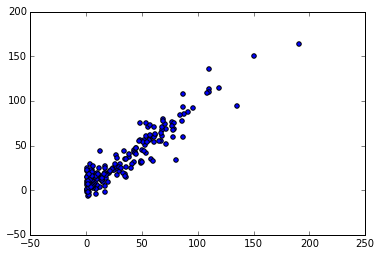

In [26]:
plt.scatter(y, model.predict(x))
plt.show()

# 2c. In this case, there are 129 input variables and only 185 rows which means we're very likely to overfit. Look at the model coefficients and see if anything jumps out as odd.

In [27]:
coeffs = DataFrame(model.coef_)

In [28]:
pltcoeffs = coeffs.transpose()

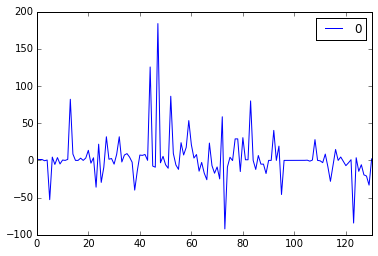

In [29]:
pltcoeffs.plot()
plt.show()

In [30]:
coeffs.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,1.47632,1.209976,1.200018,-0.444881,0.498549,-52.767496,4.437269,-5.421833,3.781165,-4.757772,...,-3.285999,0.938307,-84.177196,3.587154,-14.671811,-5.81227,-19.415516,-21.020607,-33.210577,2.050895


# 2d. Go back and split the data into a training set and a test set. Train the model on the training set and evaluate it on the test set. How does it do?

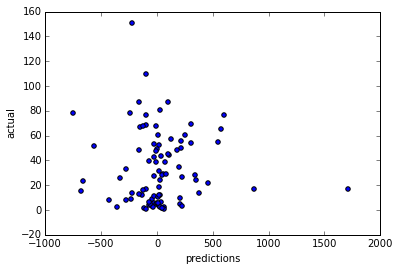

In [31]:
# split data into two parts

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# create the model
model = LinearRegression()

# train the model using inputs and known outputs from the training set
model.fit(x_train, y_train)

# create predictions from new data
predictions = model.predict(x_test)

# see how we did
plt.scatter(predictions, y_test)
plt.xlabel('predictions')
plt.ylabel('actual')
plt.show()


### _Our model doesn't do so well now. It seems to do better predicting stations with 0 riders than other stations. Our model is also predicting some very large negative values for ridership._

In [32]:
# Looking at Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print mse

95031.1551286


# 3a. Since we have so many variables, this is a good candidate for regularization. In particular, since we'd like to eliminate a lot of them, lasso seems like a good candidate. Build a lasso model on your training data for various values of alpha. Which variables survive?

In [33]:
from sklearn.linear_model import Lasso

# alpha .05
model = Lasso(alpha=0.05)
model.fit(x_train, y_train)
coeffs_05 = DataFrame(np.round(model.coef_, 1))

# alpha .25
model = Lasso(alpha=0.25)
model.fit(x_train, y_train)
coeffs_25 = DataFrame(np.round(model.coef_, 1))

# alpha .45
model = Lasso(alpha=0.45)
model.fit(x_train, y_train)
coeffs_45 = DataFrame(np.round(model.coef_, 1))

# alpha .65
model = Lasso(alpha=0.65)
model.fit(x_train, y_train)
coeffs_65 = DataFrame(np.round(model.coef_, 1))

# alpha .85
model = Lasso(alpha=0.85)
model.fit(x_train, y_train)
coeffs_85 = DataFrame(np.round(model.coef_, 1))

# alpha 1.05
model = Lasso(alpha=1.05)
model.fit(x_train, y_train)
coeffs_105 = DataFrame(np.round(model.coef_, 1))

# which variables survive at alpha of 0.05
coeffs_surviving = coeffs_05[abs(coeffs_05) > 0].dropna()
columns_surviving = [x_train.dtypes.index[i] for i in coeffs_surviving.index]
print 'Columns suriving at alpha of 0.05: {}'.format(columns_surviving)


Columns suriving at alpha of 0.05: ['no_bikes', 'no_empty_docks', 'fast_food', 'parking', 'restaurant', 'convenience', 'post_office', 'bicycle_parking', 'drinking_water', 'recycling', 'waste_basket', 'cafe', 'currency_exchange', 'pharmacy', 'car_sharing', 'bank', 'bar', 'club', 'kindergarten', 'place_of_worship', 'post_box', 'pub', 'fuel', 'grave_yard', 'public_building', 'school', 'fire_station', 'nightclub', 'atm', 'hospital', 'doctors', 'university', 'police', 'dry_cleaner', 'arts_centre', 'studio', 'community_centre', 'clinic', 'bench', 'cinema', 'college', 'food_cart', 'border_control', 'catering', 'dojo', 'taxi', 'traffic_signals', 'crossing', 'motorway_junction', 'bus_stop', 'speed_camera', 'stop', 'turning_circle', 'traffic_signals.bus_stop', 'mini_roundabout', 'hotel', 'artwork', 'information', 'attraction', 'landmark', 'guest_house', 'gallery']


In [34]:
# surviving variables at alpha of 0.25
coeffs_surviving = coeffs_25[abs(coeffs_25) > 0].dropna()
columns_surviving = [x_train.dtypes.index[i] for i in coeffs_surviving.index]
print 'Columns suriving at alpha of 0.25: {}'.format(columns_surviving)

Columns suriving at alpha of 0.25: ['no_bikes', 'no_empty_docks', 'fast_food', 'parking', 'restaurant', 'post_office', 'drinking_water', 'cafe', 'car_sharing', 'bank', 'bar', 'kindergarten', 'place_of_worship', 'post_box', 'pub', 'school', 'fire_station', 'nightclub', 'doctors', 'university', 'marketplace', 'bicycle_repair_station', 'community_centre', 'cinema', 'car_rental', 'taxi', 'traffic_signals', 'crossing', 'motorway_junction', 'bus_stop', 'turning_circle', 'hotel', 'information', 'museum', 'attraction', 'landmark']


In [35]:
# surviving variables at alpha of 0.45
coeffs_surviving = coeffs_45[abs(coeffs_45) > 0].dropna()
columns_surviving = [x_train.dtypes.index[i] for i in coeffs_surviving.index]
print 'Columns suriving at alpha of 0.45: {}'.format(columns_surviving)

Columns suriving at alpha of 0.45: ['no_bikes', 'no_empty_docks', 'fast_food', 'parking', 'restaurant', 'post_office', 'drinking_water', 'cafe', 'car_sharing', 'bank', 'bar', 'place_of_worship', 'post_box', 'school', 'fire_station', 'nightclub', 'doctors', 'arts_centre', 'traffic_signals', 'crossing', 'motorway_junction', 'bus_stop', 'turning_circle', 'hotel', 'information', 'museum', 'attraction', 'landmark']


In [36]:
# surviving variables at alpha of 0.65
coeffs_surviving = coeffs_65[abs(coeffs_65) > 0].dropna()
columns_surviving = [x_train.dtypes.index[i] for i in coeffs_surviving.index]
print 'Columns suriving at alpha of 0.65: {}'.format(columns_surviving)

Columns suriving at alpha of 0.65: ['no_bikes', 'no_empty_docks', 'fast_food', 'parking', 'restaurant', 'post_office', 'drinking_water', 'cafe', 'bank', 'bar', 'place_of_worship', 'post_box', 'school', 'fire_station', 'traffic_signals', 'crossing', 'motorway_junction', 'bus_stop', 'stop', 'turning_circle', 'hotel', 'information', 'museum', 'attraction']


In [37]:
# surviving variables at alpha of 0.85
coeffs_surviving = coeffs_85[abs(coeffs_85) > 0].dropna()
columns_surviving = [x_train.dtypes.index[i] for i in coeffs_surviving.index]
print 'Columns suriving at alpha of 0.5: {}'.format(columns_surviving)

Columns suriving at alpha of 0.5: ['no_bikes', 'no_empty_docks', 'fast_food', 'parking', 'restaurant', 'drinking_water', 'cafe', 'bank', 'place_of_worship', 'post_box', 'school', 'fire_station', 'traffic_signals', 'crossing', 'motorway_junction', 'bus_stop', 'stop', 'turning_circle', 'hotel', 'information', 'attraction']


In [38]:
# surviving variables at alpha of 1.05
coeffs_surviving = coeffs_105[abs(coeffs_105) > 0].dropna()
columns_surviving = [x_train.dtypes.index[i] for i in coeffs_surviving.index]
print 'Columns suriving at alpha of 1.05: {}'.format(columns_surviving)

Columns suriving at alpha of 1.05: ['no_bikes', 'no_empty_docks', 'fast_food', 'parking', 'restaurant', 'drinking_water', 'cafe', 'bank', 'place_of_worship', 'post_box', 'school', 'traffic_signals', 'crossing', 'motorway_junction', 'bus_stop', 'stop', 'hotel', 'information']


# 3b. How does this model perform on the test set?

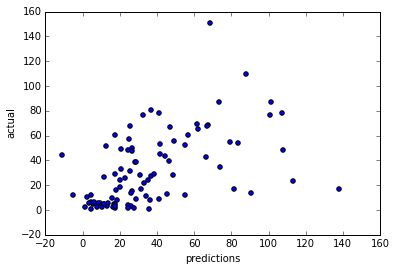

In [39]:
model = Lasso(alpha=1.05)

model.fit(x_train, y_train)

predictions = model.predict(x_test)

# see how we did
plt.scatter(predictions, y_test)
plt.xlabel('predictions')
plt.ylabel('actual')
plt.show()

In [40]:
# Looking at Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print mse

856.346417057


### _This is slightly better! Not great, but much fewer negative predictions, and some predictions that come close to actual values. Our mean squared error here is also much lower than for our linear regression model._

# 4. No matter how high I make alpha, the coefficient on crossing ("number of nearby crosswalks") never goes away. Try a simple linear regression on just that variable.

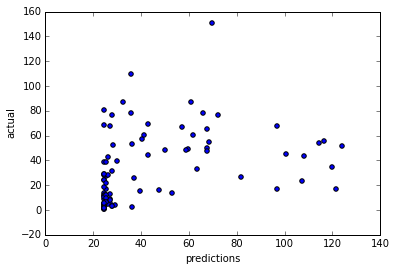

In [41]:
model = LinearRegression()

x_train_crossing = DataFrame(x_train['crossing'])
x_test_crossing = DataFrame(x_test['crossing'])

model.fit(x_train_crossing, y_train)

predictions = model.predict(x_test_crossing)

# see how we did
plt.scatter(predictions, y_test)
plt.xlabel('predictions')
plt.ylabel('actual')
plt.show()

In [42]:
# Looking at Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print mse

1129.57322862


### This seems to be better than our original Linear Regression, but worse than our Lasso with alpha=1.05.